<a href="https://colab.research.google.com/github/Sun-ny-A/food-sales-predictions/blob/main/Project_2_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project 2 Part 1


Senait Abate

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
#import
import pandas as pd
import numpy as np

**first choice dataset: Global Cause of Death of Children Under 5**

source: https://www.who.int/data/gho/data/themes/topics/sdg-target-3_2-newborn-and-child-mortality

In [5]:
#upload data
df = pd.read_csv('/content/cause of death under 5.csv')
df.head(10)

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,MORT_300,Distribution of causes of death among children...,numeric,AFR,Africa,Country,AGO,Angola,Year,2017,...,NaN,NaN,NaN,NaN,NaN,0.0008,NaN,NaN,EN,2018-11-27 00:00:00
1,MORT_300,Distribution of causes of death among children...,numeric,AFR,Africa,Country,AGO,Angola,Year,2017,...,NaN,NaN,NaN,NaN,NaN,0.0050,NaN,NaN,EN,2018-11-27 00:00:00
2,MORT_300,Distribution of causes of death among children...,numeric,AFR,Africa,Country,AGO,Angola,Year,2017,...,NaN,NaN,NaN,NaN,NaN,0.0120,NaN,NaN,EN,2018-11-27 00:00:00
3,MORT_300,Distribution of causes of death among children...,numeric,AFR,Africa,Country,AGO,Angola,Year,2017,...,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,EN,2018-11-27 00:00:00
4,MORT_300,Distribution of causes of death among children...,numeric,AFR,Africa,Country,AGO,Angola,Year,2017,...,NaN,NaN,NaN,NaN,NaN,0.0120,NaN,NaN,EN,2018-11-27 00:00:00
5,MORT_300,Distribution of causes of death among children...,numeric,AFR,Africa,Country,AGO,Angola,Year,2017,...,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,EN,2018-11-27 00:00:00
6,MORT_300,Distribution of causes of death among children...,numeric,AFR,Africa,Country,AGO,Angola,Year,2017,...,NaN,NaN,NaN,NaN,NaN,0.0750,NaN,NaN,EN,2018-11-27 00:00:00
7,MORT_300,Distribution of causes of death among children...,numeric,AFR,Africa,Country,AGO,Angola,Year,2017,...,NaN,NaN,NaN,NaN,NaN,0.2700,NaN,NaN,EN,2018-11-27 00:00:00
8,MORT_300,Distribution of causes of death among children...,numeric,AFR,Africa,Country,AGO,Angola,Year,2017,...,NaN,NaN,NaN,NaN,NaN,0.3200,NaN,NaN,EN,2018-11-27 00:00:00
9,MORT_300,Distribution of causes of death among children...,numeric,AFR,Africa,Country,AGO,Angola,Year,2017,...,NaN,NaN,NaN,NaN,NaN,0.1500,NaN,NaN,EN,2018-11-27 00:00:00


I will have to clean up the dataset a lot. There's a lot of empty columns and there are also redundant columns. For example, ParentLocationCode is just the abbrivation of the ParentLocation column (AFR, Africa). 

Description of data: The data is a list of countries and regions with causes of death for children under 5 years old collected by the World Health Organization. 

In [6]:
#column list and row info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   IndicatorCode               30000 non-null  object 
 1   Indicator                   30000 non-null  object 
 2   ValueType                   30000 non-null  object 
 3   ParentLocationCode          30000 non-null  object 
 4   ParentLocation              30000 non-null  object 
 5   Location type               30000 non-null  object 
 6   SpatialDimValueCode         30000 non-null  object 
 7   Location                    30000 non-null  object 
 8   Period type                 30000 non-null  object 
 9   Period                      30000 non-null  int64  
 10  IsLatestYear                30000 non-null  bool   
 11  Dim1 type                   30000 non-null  object 
 12  Dim1                        30000 non-null  object 
 13  Dim1ValueCode               300

Target: The target is the cause of death. This column is listed as Dim2. 

This will be a classification model. 

The columns that I will actually use from this data are: ParentLocation (continent), Location (country), Period (year), Dim1 (age),  and Dim2 (cause of death).

Features: continent, country, year, age

Rows: 30,000

Below is an example of the redundancy of the columns in the data. I will spend a lot time cleaning the data and preparing it for modeling. Another challenge might be the large amount of data. I will need to be careful when creating data visualizations that it does not look overwhelming and difficult to read. For example when looking at general trends, instead of analyzing each country it would be better to group them and use the continent column instead. 

Below is an example of the redundancy of the columns in the data. 

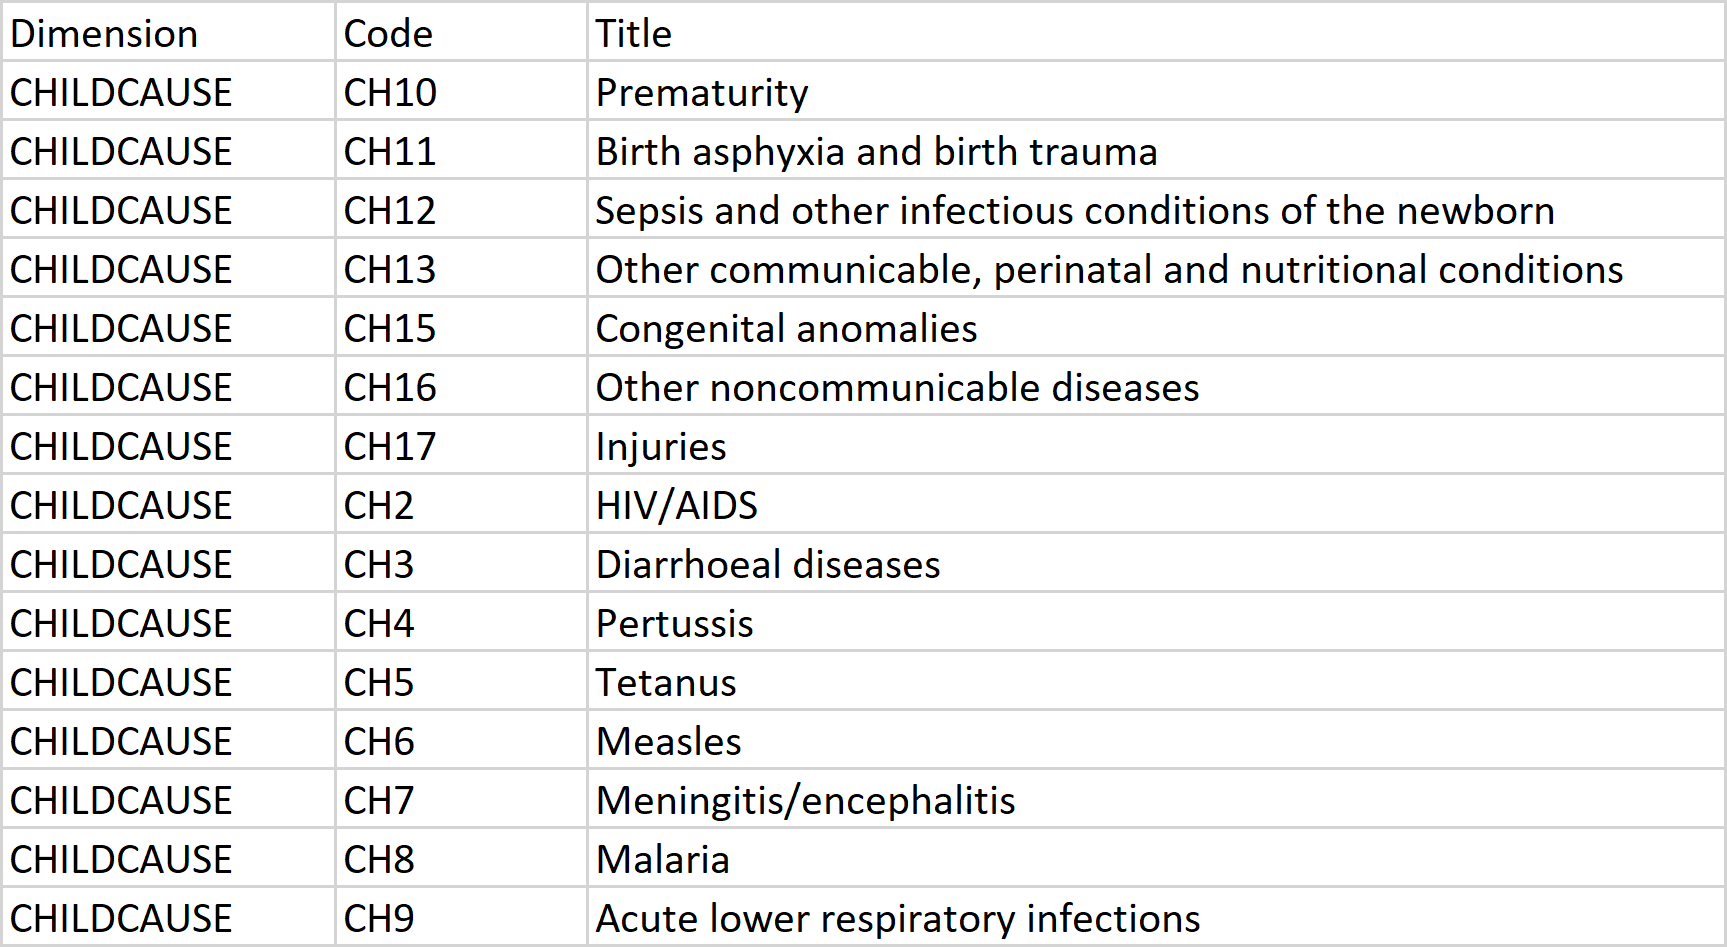

**Second choice dataset: Hospitalization Discharge Rates**

source: https://catalog.data.gov/dataset/hospitalization-discharge-rates-5bd56

In [14]:
#upload data
df2 = pd.read_csv('/content/LakeCounty_Health (1).csv')
df2.head(26)

,FID,ZIP,Anxiety_Di,Mood_Disor,Alcohol_re,Diabetes,Hypertensi,Asthma,F65_FallsER,Discharges,MH_ER,Total_MH,Total_ACSC,SHAPE_Length,SHAPE_Area
0,1,60002,393.608997,359.322499,270.177604,69.637883,20.481730,31.405320,14.946770,9590.103093,837.276281,1452.376054,0,215525.155184,1.149062e+09
1,2,60010,132.835014,153.848463,177.863833,43.503045,19.501365,16.501155,9.941825,8955.508619,388.936419,733.969741,0,178637.109618,8.027354e+08
2,3,60015,142.476163,231.371546,147.347143,18.720048,16.224042,6.240016,19.079395,8240.135205,496.383297,778.139042,0,111400.890558,3.674576e+08
3,4,60020,201.704730,452.208992,406.662763,90.111739,66.081942,60.074492,23.283437,13394.283515,911.331251,1506.278873,0,92363.084625,1.666177e+08
4,5,60030,261.648844,237.033796,250.708822,56.958420,37.972280,37.972280,20.297185,10486.759142,666.999426,1156.907256,0,247258.224672,8.455179e+08
5,6,60031,240.857947,234.704641,178.445851,60.977830,31.854090,29.123739,20.239979,8939.144091,598.628692,962.552743,0,163995.181561,5.271176e+08
6,7,60035,129.593011,256.951660,245.779848,25.992225,14.691258,19.211645,18.579208,10150.264976,688.323223,959.658589,0,115796.723820,3.457929e+08
7,8,60040,123.456790,308.641975,320.987654,18.072289,6.024096,6.024096,12.860082,9593.675308,685.185185,1037.037037,0,25907.372467,1.780943e+07
8,9,60042,261.025401,374.006545,214.274583,89.011167,16.183849,56.643470,13.879149,9951.332561,743.630201,1351.877825,0,45385.395226,4.517757e+07
9,10,60044,182.450343,230.644773,289.166581,35.961815,26.154047,22.884791,12.992508,9021.992500,575.751317,1025.852869,0,92539.708731,2.127777e+08


In [13]:
#column list and row info
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FID           26 non-null     int64  
 1   ZIP           26 non-null     int64  
 2   Anxiety_Di    26 non-null     float64
 3   Mood_Disor    26 non-null     float64
 4   Alcohol_re    26 non-null     float64
 5   Diabetes      26 non-null     float64
 6   Hypertensi    26 non-null     float64
 7   Asthma        26 non-null     float64
 8   F65_FallsER   26 non-null     float64
 9   Discharges    26 non-null     float64
 10  MH_ER         26 non-null     float64
 11  Total_MH      26 non-null     float64
 12  Total_ACSC    26 non-null     int64  
 13  SHAPE_Length  26 non-null     float64
 14  SHAPE_Area    26 non-null     float64
dtypes: float64(12), int64(3)
memory usage: 3.2 KB


Description of data: This dataset is much smaller and has 25 rows and 14 columns. It shows the hospital discharge rates of patients in Lake County, Illinois. 

Target: The target is the discharge column. 

This will be a classification model. 

I will use most of the columns in this dataset. But I will drop the FID column as they are unique values and also the Total_ACSC column as it's all 0 values. I think the last two shape columns may be for mapping but I'm not quite sure. If so, it will be interesting to try and map the data as well. 

Features: zip code, anxiety, mood, alcohol, diabetes, hypertension, asthma, discharges, shape length, and shape area. 

Rows: 25

Because this is a much smaller dataset I am worried about the accuracy of the prediction models that I will use. Also, if the shape info is for visual mapping I would need to do further research to make sure I understand how to code for this. 